# ロジスティック回帰

## ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。
### 以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

## 【問題1】仮定関数

## ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。
## ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。



$$
g(z)=1/(1+e**−z)
$$

## 線形回帰の仮定関数は次の式でした。

$$
hθ(x)=θT⋅x.
$$

## まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
hθ(x)=1/(1+e**(−θT⋅x))
$$

In [1]:
def _linear_hypo(self, X):  #仮定関数
    a = np.ones(X.shape[0])       # Xと同じ長さの１の配列を作る
    a_=a.reshape(X.shape[0], 1)   # X_の配列の型を変更する
    X_ = np.hstack([a_ ,X])         # X,X_を結合させる
    self.Theta = np.random.rand(X_.shape[1], 1)
    self.y_ = 1/(1 + np.exp(-np.dot(X_,self.Theta)))
    return self.y_

# 【問題2】最急降下法

## 最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

$$
θj=θj−α*∂J(θ)/∂θj
$$

$$
∂J(θ)/∂θ0=1/m(m∑i=1)*(hθ(x(i))−y(i))*x(i,j),j=0
$$

$$
∂J(θ)/∂θj=(1/m(m∑i=1)*(hθ(x(i))−y(i))*x(i,j)+(λ/m)*θj　,j≥1
$$

### 以上の式には正則化項が含まれます。正則化項は過学習を防ぐ目的で用いられます。切片である$\theta_0$が正則化項に含まれていないのは、切片を除いた、特徴量に対する係数を同じ視点で議論することができるようにするためです。

In [2]:
def _grad(self,X,error):
    
    m = X.shape[0]  #サンプル数
    n = X.shape[1]  #特徴量数
    for j in range(n):
        grad = 0
        for i in range(m):
            grad += (error[i] * X_[i,j]) + (1/m)*Theta[j]
        Theta[j] =Theta[j] -  (self.lr/m)*grad
       
    return Theta

## 【問題3】推定

### 推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。
### 仮定関数 $h_\theta(x)$ の出力がpredict_probaの戻り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの戻り値となります。

In [3]:
def predict(self,X):
    return np.where(self.predict_prob(X) >= 0.5, 1, 0)


def predict_prob(self,X):
    return self._linear_hypo(X)

## 【問題4】目的関数

### 以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
### なお、この数式には正則化項が含まれています。

$$
J(θ)=1/m(m∑i=1)*[−y(i)log(hθ(x(i)))−(1−y(i))*log(1−hθ(x(i)))]+λ/2m(n∑j=1)*θ2j
$$

In [4]:
def _loss(self,X,y):
    
    return (-y*np.log(_linear_hypo(X))-(1-y)*np.log(1-_linear_hypo(X)))

## 【問題5】学習と推定

### 機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。
### scikit-learnによる実装と比べ、正しく動いているかを確認してください。
### AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。 

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data,columns=["sepal_length","sepal_width","petal_length","petal_width"] )
Y = pd.DataFrame(iris.target,columns=["Species"])
df = pd.concat([X,Y],axis=1)

# sample_data = df.loc[50:149,["sepal_length","petal_length","Species"]]
# print(sample_data)

In [121]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        #self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.test_loss = np.zeros(self.iter +1)
        
    def fit(self, X, y, X_test=None, y_test=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(X.shape[1]+1)
 

        for n in range(self.iter):                  # イテレーション数だけ繰り返す
            self.y_hat = self._linear_hypo(X)                       
            self.theta = self._grad(X,y,self.y_hat)
            self.loss[n] = np.sum(self._error(self.y_hat,y)**2)/X.shape[0]         # X,yの誤差を代入
        
            self.y_hat_test = self._linear_hypo(X_test)                       
            self.theta = self._grad(X_test,y_test,self.y_hat_test)
            self.test_loss[n] = np.sum(self._error(self.y_hat_test,y_test)**2)/X_test.shape[0]    
            
        pass
        return 
        
    def _linear_hypo(self, X):  #仮定関数
        a = np.ones(X.shape[0])       # Xと同じ長さの１の配列を作る
        a_=a.reshape(X.shape[0], 1)   # X_の配列の型を変更する
        self.X_ = np.hstack([a_ ,X])         # X,X_を結合させる
        self.theta = np.random.rand(self.X_.shape[1], 1)
        self.y_ = 1/(1 + np.exp(-np.dot(self.X_,self.theta)))
        return self.y_

    def _error(self,y_hat,y):
        error = y_hat - y
        return error

    def _grad(self,X,y,y_hat):
        
        m = self.X_.shape[0]  #サンプル数
        n = self.X_.shape[1]  #特徴量数
        #self.theta = np.array([n])
        for j in range(n):
            grad = 0
            for i in range(m):
                grad += (self.y_hat[i]-y[i]) * self.X_[i,j] + (1/m)*self.theta[j]
            self.theta[j] =self.theta[j] -  (self.lr/m)*grad

        return self.theta
    
    def _loss(self,X,y):
    
        return (-y*np.log(self._linear_hypo(X))-(1-y)*np.log(1-self._linear_hypo(X)))

    def predict(self,X):
        return np.where( X >= 0.99995, 2, 1)
    
    def predict_prob(self,z):
        return 1/(1 + np.exp(-np.dot(self.X_,self.theta)))

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import warnings #ワーニング関連のモジュール？
warnings.filterwarnings('ignore') #ワーニングが消える？

iris_list = df.loc[50:149,["sepal_length","petal_length"]]#,"sepal_width","petal_width"]]
Species = df.loc[50:149,["Species"]]
X = np.array(iris_list)#iris_list_virginica))
y = np.array(Species)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(y_train.shape)

(75, 2)
(75, 1)


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
#print(scaler.mean_)
#print(scaler.var_)
X_train_trasformed= scaler.transform(X_train)
X_test_trasformed= scaler.transform(X_test)
print(X_train_trasformed)
#print(X_test_trasformed)

StandardScaler()
[[-1.26383425 -0.49078028]
 [ 0.90097156 -0.10868491]
 [-0.6453183  -1.1276059 ]
 [-0.6453183   0.27341047]
 [ 0.12782663  0.91023609]
 [ 0.28245562  0.52814072]
 [-0.95457628 -1.00024078]
 [-0.18143134 -0.36341515]
 [ 0.74634257  0.14604534]
 [-1.88235019 -2.01916177]
 [ 0.12782663  1.41969658]
 [-0.49068932 -0.87287565]
 [ 0.74634257 -0.6181454 ]
 [-0.33606033 -0.10868491]
 [-1.88235019 -1.76443152]
 [ 0.12782663  0.27341047]
 [-0.6453183   0.27341047]
 [ 0.4370846   1.16496634]
 [-0.79994729  0.14604534]
 [-0.18143134 -0.23605003]
 [-1.72772121 -2.40125714]
 [-0.95457628 -1.25497102]
 [ 0.4370846  -0.36341515]
 [-0.95457628  0.01868022]
 [-0.02680236 -0.10868491]
 [-0.33606033 -0.49078028]
 [-1.10920526 -1.50970127]
 [-0.02680236 -0.74551053]
 [ 1.21022953 -0.23605003]
 [-0.18143134  0.91023609]
 [-0.33606033 -1.1276059 ]
 [-0.49068932  0.27341047]
 [-0.18143134 -1.1276059 ]
 [ 0.74634257  1.03760121]
 [ 0.28245562 -0.49078028]
 [ 1.51948751  1.41969658]
 [-0.026802

In [166]:
'''ロジスティック回帰モデルの作成'''
#モジュール読み込み、モデル構築
slr = ScratchLogisticRegression(num_iter=10, lr = 0.1,bias=True, verbose=False)
#モデルの学習
slr.fit(X_train,y_train,X_test,y_test)
#print(type(slr))
#print(slr.loss)
y_pred_prob = slr.predict_prob(X_train)
#print(y_pred_prob)
y_pred = slr.predict(y_pred_prob)
#print(y_pred)

In [135]:
#Accuracy（正解率）
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


y_pred_prob_t = slr.predict_prob(X_test)
#print(y_pred_prob_t)
y_pred_t = slr.predict(y_pred_prob_t)
#print(y_pred_t)


y_true = y_test

#print(y_true.T)
#print(y_pred_t.T)
metrics.accuracy_score(y_true, y_pred_t)
confusion_matrix(y_true, y_pred_t)
print(confusion_matrix(y_true, y_pred_t))

[[ 6  8]
 [ 0 11]]


## 【問題6】学習曲線のプロット

### 学習曲線を見て損失が適切に下がっているかどうか確認してください。

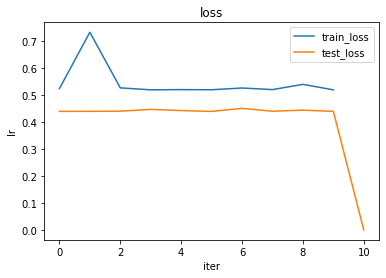

In [132]:
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("loss")
plt.xlabel("iter")
plt.ylabel("lr")
plt.plot(slr.loss,label = "train_loss") 
plt.plot(slr.test_loss,label = "test_loss")
plt.legend()
plt.show() 

## 【問題7】決定領域の可視化

### 決定領域を可視化してください。

In [168]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
# setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 1], X[y==target][:, 2], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [159]:
#print(X_train_trasformed)
y_train = y_train.reshape(-1)

In [160]:
y_true = y_true.reshape(-1)
y_pred = y_pred.reshape(-1)

In [169]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('confusion matrix = \n', confusion_matrix(y_true, y_pred_t))
print('accuracy = ', accuracy_score(y_true, y_pred_t))
print('precision = ', precision_score(y_true, y_pred_t))
print('recall = ', recall_score(y_true, y_pred_t))
print('f1 score = ', f1_score(y_true, y_pred_t))

d1 = classification_report(y_true, y_pred, output_dict=True)
df1 = pd.DataFrame(d1)
print(df1)

decision_region(X_train_trasformed, y_train, model=slr, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


confusion matrix = 
 [[ 6  8]
 [ 0 11]]
accuracy =  0.68
precision =  1.0
recall =  0.42857142857142855
f1 score =  0.6
                   1          2  accuracy  macro avg  weighted avg
precision   1.000000   0.733333      0.84   0.866667      0.882667
recall      0.714286   1.000000      0.84   0.857143      0.840000
f1-score    0.833333   0.846154      0.84   0.839744      0.838974
support    14.000000  11.000000      0.84  25.000000     25.000000


ValueError: cannot reshape array of size 673416 into shape (597,564)